<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Open the github code repo.

In [1]:
!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (356/356), done.
remote: Compressing objects: 100% (332/332), done.
remote: Total 356 (delta 59), reused 232 (delta 9), pack-reused 0
Receiving objects: 100% (356/356), 14.32 MiB | 5.22 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [2]:
# set the root path of the dataset.
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.3 MB/s eta 0:00:00


In [5]:
# Load the raw dataset into a Graph object.
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)
print(nx_graph)

Graph with 4039 nodes and 88234 edges


Below is the graph representation of the original dataset.

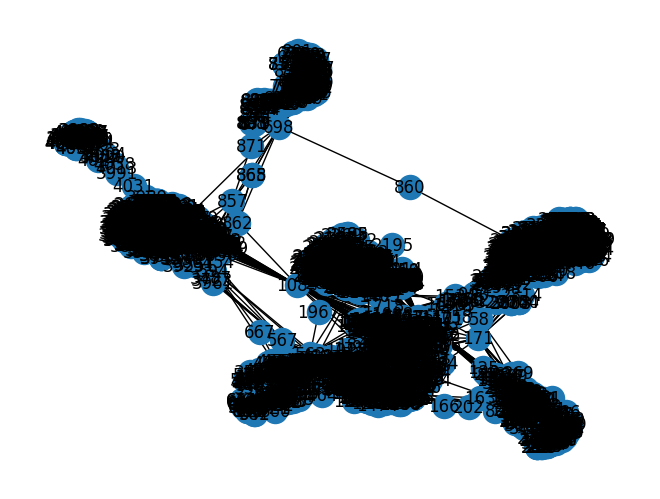

In [28]:
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()

Stage 1: Feature Engineering

In this stage, we will generate features for the graph data.
Following Centrality measures that will help us to understand this graph in the following manner:

1. Degree Centrality: Measures the number of immediate neighbors each node has. Helps to know which nodes are most connected in the network.

2. Eigen Vector Centrality: Measures how 'well-connected' a node is in the network. If a node is connected to another important (high degree/influential) node, then this node will have high Eigen vector centrality.

3. Closeness Centrality: How many steps does a node take to reach every other node in the network? Measures the "closeness" of a node with every other node in the network.

4. Betweenness Centrality: Measures if a node is a 'bridge' between differnt clusters. How often does a node appear in the shortest paths between other nodes? Helps to find those nodes that become connections between different groups of nodes within a network.

5. There are other measures like Katz Centrality, PageRank, Percolation Centrality, Subgraph Centrality and Harmonic Centrality that can be analysed if time permits.

In [9]:
#1. Calculate Degree Centrality

import pandas as pd

degree_centrality = nx.degree_centrality(nx_graph)
degreeDataFrame = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
degreeDataFrame_sorted = degreeDataFrame.sort_values('Degree Centrality', ascending=False)
degreeDataFrame_sorted.reset_index(drop=True, inplace=True)
print(degreeDataFrame_sorted)

      Node  Degree Centrality
0      107           0.258791
1     1684           0.196137
2     1912           0.186974
3     3437           0.135463
4        0           0.085934
5     2543           0.072808
6     2347           0.072065
7     1888           0.062902
8     1800           0.060674
9     1663           0.058197
10    2266           0.057949
11    1352           0.057949
12     483           0.057207
13     348           0.056711
14    1730           0.055968
15    1985           0.055473
16    1941           0.055225
17    2233           0.054978
18    2142           0.054730
19    1431           0.054482
20    1199           0.053739
21    1584           0.052254
22    2206           0.052006
23    1768           0.051758
24    2611           0.051263
25    2229           0.051263
26    2410           0.051263
27    1589           0.050768
28    2218           0.050768
29    2047           0.050768
30    1086           0.050768
31    2078           0.050520
32    2123

Analysis:

Above sorted data Frame shows that:
node 107 has 1045 connections,
node 1684 has 791 connections.

and at lower end of the spectrum:

Indices 3964 through 4038 have 1 connection each.


In [10]:
#2. Calculate Eigen Vector Centrality
eigenVectorcentrality = nx.eigenvector_centrality(nx_graph)

eigenVectorDataFrame = pd.DataFrame(eigenVectorcentrality.items(), columns=['Node', 'Eigen Vector Centrality'])
print(eigenVectorDataFrame)

      Node  Eigen Vector Centrality
0        0             3.391796e-05
1        1             6.045346e-07
2        2             2.233461e-07
3        3             6.635648e-07
4        4             2.236416e-07
5        5             1.183322e-06
6        6             2.170904e-07
7        7             2.568510e-05
8        8             2.197375e-07
9        9             2.214117e-06
10      10             7.708567e-07
11      11             2.103123e-07
12      12             2.103123e-07
13      13             1.103791e-06
14      14             2.305568e-07
15      15             2.103123e-07
16      16             2.616514e-07
17      17             2.277417e-07
18      18             2.103123e-07
19      19             2.314909e-07
20      20             2.303888e-07
21      21             2.596576e-05
22      22             1.036542e-06
23      23             2.327856e-07
24      24             2.487564e-07
25      25             2.092048e-06
26      26             2.333

In [24]:
#merge the 2 data frames
socialClusterDataFrame = pd.merge(degreeDataFrame_sorted, eigenVectorDataFrame,on = 'Node')
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality
count,4039.000000,4039.000000,4039.000000
mean,2019.000000,0.010820,0.003864
std,1166.103197,0.012982,0.015255
min,0.000000,0.000248,0.000000
25%,1009.500000,0.002724,0.000000
50%,2019.000000,0.006191,0.000001
75%,3028.500000,0.014116,0.000033
max,4038.000000,0.258791,0.095407


In [12]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality
0      107           0.258791             2.606940e-04
1     1684           0.196137             7.164260e-06
2     1912           0.186974             9.540696e-02
3     3437           0.135463             9.531613e-08
4        0           0.085934             3.391796e-05
5     2543           0.072808             7.287131e-02
6     2347           0.072065             8.032160e-02
7     1888           0.062902             1.060441e-04
8     1800           0.060674             1.019310e-04
9     1663           0.058197             1.285378e-04
10    2266           0.057949             8.698328e-02
11    1352           0.057949             1.270982e-04
12     483           0.057207             1.385700e-05
13     348           0.056711             1.458780e-05
14    1730           0.055968             9.479058e-05
15    1985           0.055473             8.273781e-02
16    1941           0.055225             5.168118e-02
17    2233

Analysis: The above Dataframe shows that the Eigen vector centrality (Influential connections or Well-connected nodes) is low for the top 2 nodes with "many" neighbors (high degree centrality).
Node index 2, 3 have large number of neighbors and influential neighbors.

In [25]:
#3. Closeness Centrality
closenesscentrality = nx.closeness_centrality(nx_graph)
closenessDataFrame = pd.DataFrame(closenesscentrality.items(), columns=['Node', 'Closeness Centrality'])

socialClusterDataFrame = pd.merge(socialClusterDataFrame, closenessDataFrame,on = 'Node')
socialClusterDataFrame.describe()
#Nodes with high closeness centrality mean they are relatively close to all other nodes in the graph.
#Formula = Reciprocal of sum of shortest paths between a node and all other nodes in the graph.

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality
count,4039.000000,4039.000000,4039.000000,4039.000000
mean,2019.000000,0.010820,0.003864,0.276168
std,1166.103197,0.012982,0.015255,0.036124
min,0.000000,0.000248,0.000000,0.178255
25%,1009.500000,0.002724,0.000000,0.260348
50%,2019.000000,0.006191,0.000001,0.282457
75%,3028.500000,0.014116,0.000033,0.315001
max,4038.000000,0.258791,0.095407,0.459699


In [14]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality  Closeness Centrality
0      107           0.258791             2.606940e-04              0.459699
1     1684           0.196137             7.164260e-06              0.393606
2     1912           0.186974             9.540696e-02              0.350947
3     3437           0.135463             9.531613e-08              0.314413
4        0           0.085934             3.391796e-05              0.353343
5     2543           0.072808             7.287131e-02              0.291300
6     2347           0.072065             8.032160e-02              0.283408
7     1888           0.062902             1.060441e-04              0.321292
8     1800           0.060674             1.019310e-04              0.321599
9     1663           0.058197             1.285378e-04              0.339185
10    2266           0.057949             8.698328e-02              0.281708
11    1352           0.057949             1.270982e-04              0.339157

Analysis: From above, node 1912, 3437 have a high Centrality measures untill now.

In [26]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(nx_graph)
print(betweenness_centrality)


{0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.673274954378314e-06, 42: 0.0, 

In [27]:
betweennessDataFrame = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])
socialClusterDataFrame = pd.merge(socialClusterDataFrame, betweennessDataFrame,on = 'Node')
#pd.set_option('display.float_format', lambda x: '%.6f' % x)
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality,Betweenness Centrality
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,2019.000000,0.010820,0.003864,0.276168,0.000667
std,1166.103197,0.012982,0.015255,0.036124,0.011646
min,0.000000,0.000248,0.000000,0.178255,0.000000
25%,1009.500000,0.002724,0.000000,0.260348,0.000000
50%,2019.000000,0.006191,0.000001,0.282457,0.000003
75%,3028.500000,0.014116,0.000033,0.315001,0.000015
max,4038.000000,0.258791,0.095407,0.459699,0.480518


2. Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.gcf().set_size_inches(10, 6)  # Adjust width and height as needed

# For multiple measures
socialClusterDataFrame.hist()
plt.show()

In [ ]:
sns.pairplot(socialClusterDataFrame)
plt.show()